In this notebook, I
- read in the height anomlies computed from Arctic DEM and convert the coordinates to lat/lon
- filter out unrealistically large height anomlies (< 50 m)
- save data as an h5 file for further analyis 
- make a couple of dh vs time scatterplots (both binned an unbinned)

In [1]:
import pandas as pd
import h5py
from utils import transform_coord
from utils import binning

In [41]:
df = pd.read_csv('data_sample_0617.csv') #read in output for Arctic DEM
lon, lat= transform_coord('32607','4326', df['x'].values, df['y'].values) #re-project from UTM 7 to WGS84
#addd lat and lon to dataframe
df['lon'] = lon
df['lat'] = lat
display(df.head())



,Unnamed: 0,x,y,h_li,Z1,Z_Z1,t_year,lon,lat
0,0,699254.2079,6579142.437,1061.844116,-9999.0,11060.84412,2019.238933,-137.499895,59.304029
1,1,699253.2196,6579122.437,1068.238525,-9999.0,11067.23853,2019.238933,-137.499931,59.303850
2,2,699248.0569,6579002.402,1113.445068,-9999.0,11112.44507,2019.238933,-137.500132,59.302777
3,3,699247.2329,6578982.394,1116.871948,-9999.0,11115.87195,2019.238933,-137.500165,59.302598
4,4,699246.3969,6578962.387,1120.103271,-9999.0,11119.10327,2019.238933,-137.500198,59.302419


(array([2.19196e+05, 3.60000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 4.15180e+04, 1.27120e+04, 5.17400e+03]),
 array([-1062.2726  ,   428.810397,  1919.893394,  3410.976391,
         4902.059388,  6393.142385,  7884.225382,  9375.308379,
        10866.391376, 12357.474373, 13848.55737 ]),
 <a list of 10 Patch objects>)

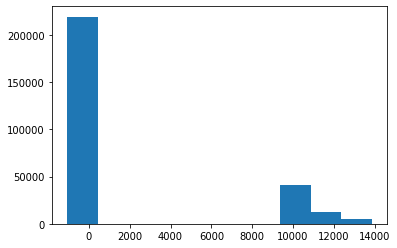

In [52]:
#look at distribution of elevation anomalies
from matplotlib import pyplot as plt
plt.hist(df['Z_Z1'])

In [101]:
#filter out high anomalies
import numpy as np
df_filtered = df.loc[abs(df['Z_Z1']) < 50]
len(df_filtered)
np.max(df_filtered['Z_Z1'])

49.98547363

In [2]:
#check new histogram
plt.hist(df_filtered['Z_Z1'], 50)

NameError: name 'plt' is not defined

In [103]:
#write filtered data to h5 file
f2 = h5py.File('filtered_v2.h5', 'w')

In [104]:
f2['x'] = df_filtered['x']
f2['y'] = df_filtered['y']
f2['h_li'] = df_filtered['h_li']
f2['dh'] = df_filtered['Z_Z1']
f2['t_year'] = df_filtered['t_year']
f2['lon'] = df_filtered['lon']
f2['lat'] = df_filtered['lat']

In [105]:
f2.close()

Text(0, 0.5, 'residual elevation')

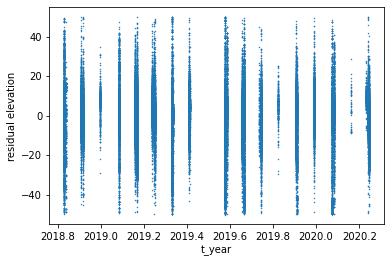

In [106]:
#make a scatterplot of dh vs year
plt.scatter(df_filtered['t_year'],  df_filtered['Z_Z1'], s = 0.1)
plt.xlabel('t_year')
plt.ylabel('residual elevation')

//anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1146: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


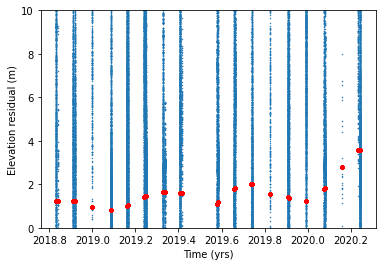

In [108]:
#bin data and compare to original scatterplot (adapted from SceinceDataGeneration tutorial)
plt.figure()
plt.scatter(df_filtered['t_year'],  df_filtered['Z_Z1'], s = 0.1)
xb,yb = binning(df_filtered['t_year'], df_filtered['Z_Z1'], xmin=2018.5,xmax=2020.26, dx=0.1, window=0.25,interp=True, median=True)[0:2]
#plt.plot(t_new,z_i_new,'.',markersize=0.1)
plt.plot(xb, yb,'r.')
plt.ylim([0,10])
plt.ylabel('Elevation residual (m)')
plt.xlabel('Time (yrs)')
plt.savefig("topo_timeseries_10km.png")


1434.131836